# AMATH 422 HW 5 Submission

## I Dwell time distributions: theory. 
Consider an ion channel with 4 open states and 2 closed states.
Give a mathematical argument, similar to that in class, that derives the typical functional form of the
dwell time distribution for the channel being in any one of the open states. Note: I am looking for a
derivation here, not just a statement of the answer or a “mantra” or result from class.

Four open states $(S_1, S_2, S_3,S_4)$
Two closed states $(S_5, S_6)$

$\Omega = \{Open, Closed\} = \{S_1, S_2, S_3, S_4, S_5, S_6\}$

Indistinguishable between $S$ and the other open states

We want to find the mathematical arguement for the dwell time: $P$(Dwell time in $(C_1, C_2, C_3,C_4)$ for $k$ steps)

We are going to assume time is homogenous and time does not affect the markov chain probabilities.
We are going to assume the gate starts in the open condition $X_0 \in \{Open\}$

Want to find the probabiltiy Open for K steps
$P(T_o >= k)$


We know that the probablity of going to other open steps is 
$A p_0 = p_1$
Only interested in open states

$\begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} & a_{15} & a_{16} \\
a_{21} & a_{22} & a_{23} & a_{24} & a_{25} & a_{26} \\
a_{31} & a_{32} & a_{33} & a_{34} & a_{35} & a_{36} \\
a_{41} & a_{42} & a_{43} & a_{44} & a_{45} & a_{46} \\
a_{51} & a_{52} & a_{53} & a_{54} & a_{55} & a_{56} \\
a_{61} & a_{62} & a_{63} & a_{64} & a_{65} & a_{66} \\
\end{bmatrix}
\begin{bmatrix}
p_{1}(0) \\
p_{2}(0) \\
p_{3}(0) \\
p_{4}(0) \\
0 \\
0 \\
\end{bmatrix} = 
\begin{bmatrix}
p_{1}(1) \\
p_{2}(1) \\
p_{3}(1) \\
p_{4}(1) \\
p_{5}(1) \\
p_{6}(1) \\
\end{bmatrix}$

We can remove the two right columns due to the zeros in p(0) we can remove the bottom two row because those would release us from the dwell time. Simplifying becomes

$\begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44} \\
\end{bmatrix}
\begin{bmatrix}
p_{1}(0) \\
p_{2}(0) \\
p_{3}(0) \\
p_{4}(0) \\
\end{bmatrix} = 
\begin{bmatrix}
p_{1}(1) \\
p_{2}(1) \\
p_{3}(1) \\
p_{4}(1) \\
\end{bmatrix}$

This holds for k and k+1 steps because

$P^c_{1,2,3,4}(k) = P(X_k = S_i| X_t \in \{S_1,S_2,S_3,S_4\} 0<= t <= k-1)$

$\begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14} \\
a_{21} & a_{22} & a_{23} & a_{24} \\
a_{31} & a_{32} & a_{33} & a_{34} \\
a_{41} & a_{42} & a_{43} & a_{44} \\
\end{bmatrix}
\begin{bmatrix}
p_{1}(k) \\
p_{2}(k) \\
p_{3}(k) \\
p_{4}(k) \\
\end{bmatrix} = 
\begin{bmatrix}
p_{1}(k+1) \\
p_{2}(k+1) \\
p_{3}(k+1) \\
p_{4}(k+1) \\
\end{bmatrix}$


Linear map of matrix $A$ can be expressed as. A is 4x4 so there should be 4 terms in the final math expression

$A = \sum_{i=1}^{n} C_i \lambda_i \mathbf{v}_i$

Where $\lambda_i$ is the corresponding eigenvalue $v_i$ is the corresponding eigenvector and $C_i$ is the corresponding arbitrary constant 

Thus at time step k the probabilty the channel is in the open state 

$P^c_{1,2,3,4}(k) = C_1\lambda_{1}^k \mathbf{v}^1 + C_2\lambda_{2}^k \mathbf{v}^2 + C_3\lambda_{3}^k \mathbf{v}^3 + C_4\lambda_{4}^k \mathbf{v}^4$



## II Simulating Markov chains and neural spiking

In [ ]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline  
import numpy as np  # That gives numerical arrays and tools for manipulating them
import scipy.optimize as opt
import scipy.linalg as la

from scipy.optimize import curve_fit

In [ ]:
# Initialize random number generator
rng = np.random.default_rng()
#Define Transition Matrices
A = np.array([[0.98, 0.10, 0],
             [0.02, 0.70, 0.05],
             [0, 0.20, 0.95]]) #Inward Channel

B = np.array([[0.90, 0.10, 0],
             [0.10, 0.60, 0.10],
             [0, 0.30, 0.90]]) #BOutward Channel
print(A)
print(B)

[[0.98 0.1  0.  ]
 [0.02 0.7  0.05]
 [0.   0.2  0.95]]
[[0.9 0.1 0. ]
 [0.1 0.6 0.1]
 [0.  0.3 0.9]]


In [ ]:
def voltage_gate(Tmax, A, count, Direction):
    #matrix A
    states=np.zeros(Tmax,dtype=int)
    states[0]=0
    voltage=np.zeros(Tmax,dtype=int)
    voltage[0]=0
    plt.figure()
    for i in range(count):      
        for t in np.arange(Tmax - 1):
            r = rng.uniform(0, 1) # draw random variable (uniformly distributed in 0,1)
            if states[t] == 0:
                if r < A[0, 0]: #transition 0 to 0
                    states[t + 1] = 0
                    voltage[t + 1] += 0
                else: #transition 0 to 1
                    states[t + 1] = 1
                    
            elif states[t] == 1:
                if r < A[1, 1]: #transition 1 to 1.
                    states[t + 1] = 1
                elif A[1, 1] < r < A[1, 1] + A[0, 1]: #transition 1 to 0.
                    states[t + 1] = 0
                    #transition 1 to 1 < r < transition 1 to 1 + transition 1 to 0
                else: #transition 1 to 2
                    states[t + 1] = 2
                    if Direction == "Inward":
                        voltage[t + 1] += 1
                    else:
                        voltage[t + 1] -= 1

            elif states[t] == 2:
                if r < A[2, 2]: #transition 2 to 2
                    states[t + 1] = 2
                    if Direction == "Inward":
                        voltage[t + 1] += 1
                    else:
                        voltage[t + 1] -= 1
                else: #transition 2 to 1
                    states[t + 1] = 1  
        #Plot of states
        #plt.plot(states)
        #plt.xlabel('state')
        #plt.ylabel('timestep')
        #plt.yticks([0, 1, 2])  # Limit y-axis to only show values 0, 1, 2
        #print(A)
    return states, voltage


Assume there are a total of  $n_{inward} = 100$ inward channels, each evolving independently under a
realization of the Markov kinetics above. If $n_{inward}$ of these channels are in the open configuration at
timestep $t$, then the total inward current is $+n_{inward}$

<Figure size 640x480 with 0 Axes>

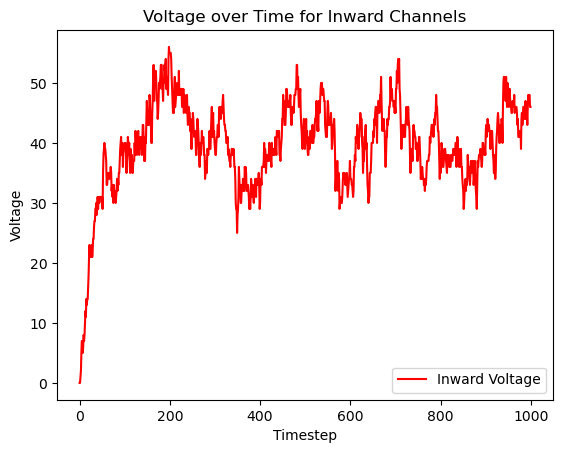

In [ ]:
states_inward, voltage_inward = voltage_gate(Tmax=1000,A=A, count=100,Direction="Inward")
plt.figure()
plt.plot(voltage_inward, label="Inward Voltage", color="red")
plt.xlabel("Timestep")
plt.ylabel("Voltage")
plt.legend()
plt.title("Voltage over Time for Inward Channels")
plt.show()

Assume there are a total of $N_{outward} = 50$ outward channels, each evolving independently under a
realization of the Markov kinetics above. If $n_{outward}$ of these channels are in the open configuration at
timestep $t$, then the total outward current is $−n_{outward}$ units.

<Figure size 640x480 with 0 Axes>

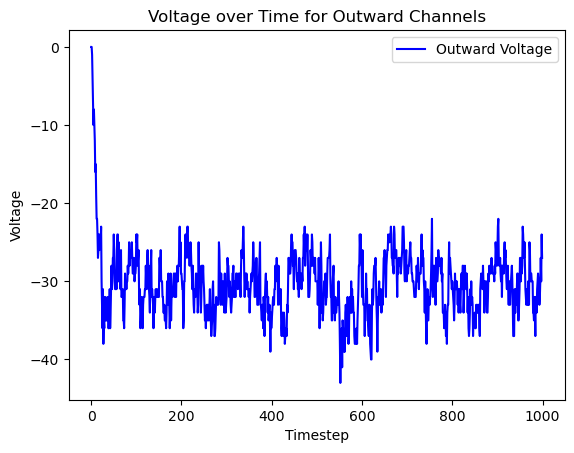

In [ ]:
states_outward, voltage_outward = voltage_gate(Tmax=1000,A=B, count=50,Direction="Outward")
plt.figure()
plt.plot(voltage_outward, label="Outward Voltage", color="blue")
plt.xlabel("Timestep")
plt.ylabel("Voltage")
plt.legend()
plt.title("Voltage over Time for Outward Channels")
plt.show()

Thus, the net current into the cell at timestep $t$ is $n_{inward} − n_{outward}$: the number of open inward channels minus the number of open outward channels. 

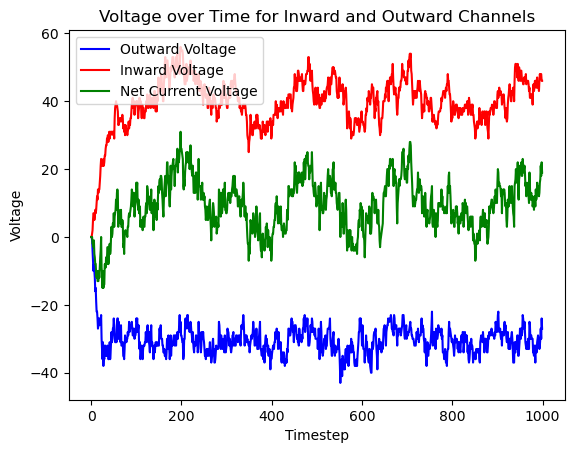

In [ ]:
net_current = voltage_inward + voltage_outward

#Plot of Net Current
plt.figure()
plt.plot(voltage_outward, label="Outward Voltage", color="blue")
plt.plot(voltage_inward, label="Inward Voltage", color="red")
plt.plot(net_current, label="Net Current Voltage", color="green")
plt.xlabel("Timestep")
plt.ylabel("Voltage")
plt.legend()
plt.title("Voltage over Time for Inward and Outward Channels")
plt.show()

In our model, the cell will produce an action potential (spike) in a given timestep if this net current is greater than a threshold value $T$. Assume that the channels have settled into equilibrium (i.e., that a time has passed that is large enough since a simulation was initialized). Plot the probability that the cell will produce a spike in a given timestep, as a function of the spiking threshold $T$.

There are at least two ways of doing this: (1) by computing the equilibrium state probabilities, and simulating many coin tossings, or (2) by computing the equilibrium state probabilities, and using the form of the binomial distribution.

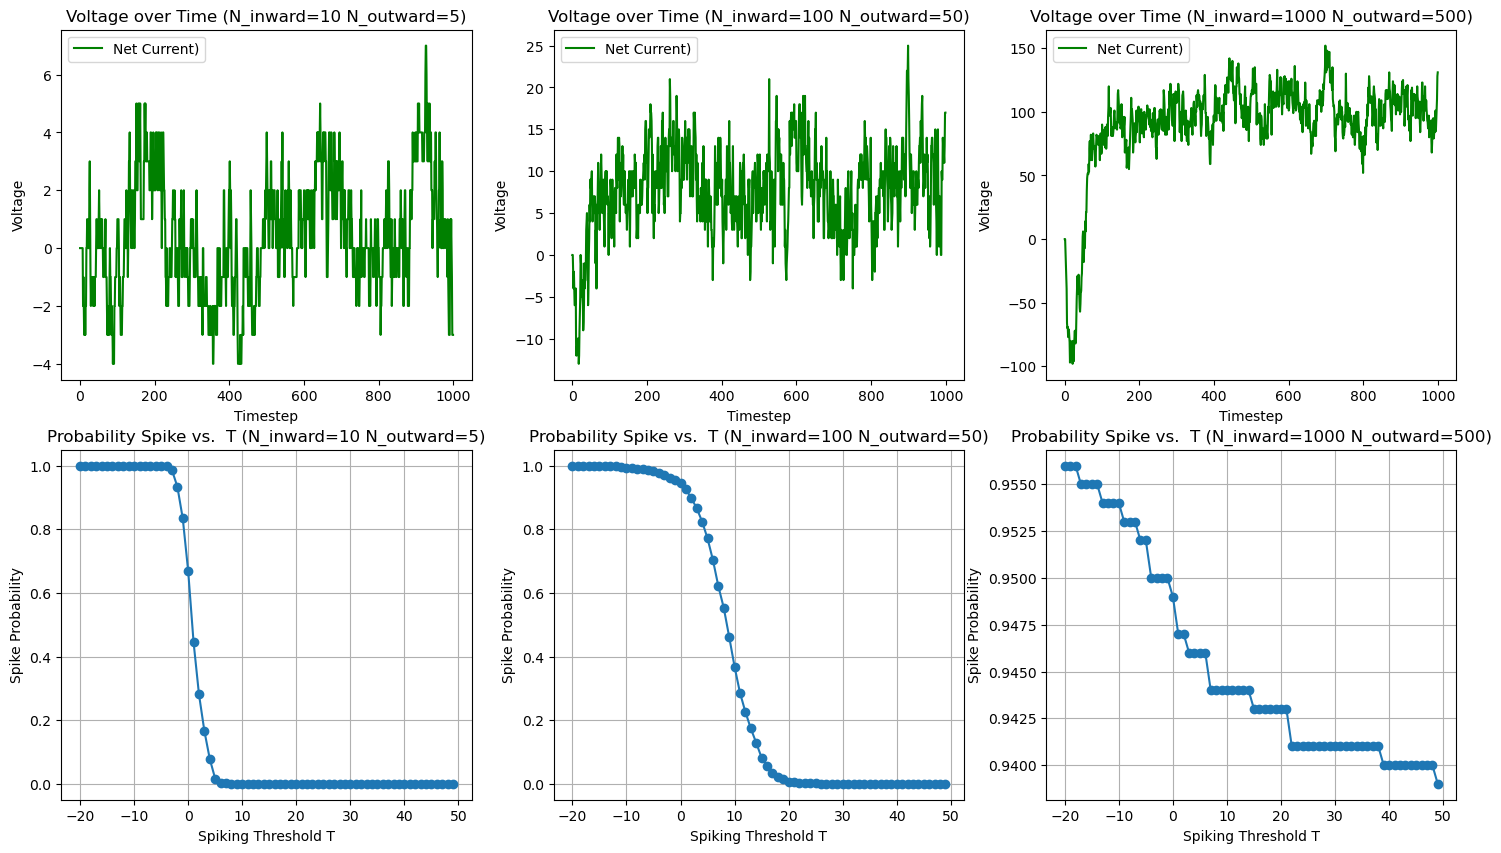

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Define threshold range and Tmax
thresholds = np.arange(-20, 50, 1)
Tmax = 1000

# Define spike probability calculation function
def spike_probability(voltage, thresholds):
    spike_probs = []
    for T in thresholds:
        spikes = np.sum(voltage >= T)  # Count timesteps where voltage >= T
        spike_prob = spikes / len(voltage)  # Fraction of timesteps with spikes
        spike_probs.append(spike_prob)
    return spike_probs

# Create subplots with a 2x3 grid
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # Adjust figsize as needed
counts = [10, 100, 1000]

for i, count in enumerate(counts):
    # Generate voltage data
    states_inward, voltage_inward = voltage_gate(Tmax=Tmax, A=A, count=count, Direction="Inward")
    states_outward, voltage_outward = voltage_gate(Tmax=Tmax, A=B, count=count // 2, Direction="Outward")
    
    # Calculate net current and spike probabilities
    net_current = voltage_inward + voltage_outward
    spike_probs = spike_probability(net_current, thresholds)
    
    # Plot net current voltage over time
    ax1 = axes[0, i]  # First row
    ax1.plot(net_current, label=f"Net Current)", color="green")
    ax1.set_xlabel("Timestep")
    ax1.set_ylabel("Voltage")
    ax1.legend()
    ax1.set_title(f"Voltage over Time (N_inward={count} N_outward={count//2})")
    
    # Plot spike probability vs. threshold
    ax2 = axes[1, i]  # Second row
    ax2.plot(thresholds, spike_probs, marker='o', linestyle='-')
    ax2.set_xlabel("Spiking Threshold T")
    ax2.set_ylabel("Spike Probability")
    ax2.set_title(f"Probability Spike vs.  T (N_inward={count} N_outward={count//2})")
    ax2.grid(True)

# Adjust layout and display
plt.tight_layout()
plt.show()


(2) by computing the equilibrium state probabilities, and using the form of the binomial distribution.

Write a few sentences reporting on any qualitative changes that you observe.

In [ ]:
# At longer time the average net current is more settled on one value. At shorter Time max there is less 
# The more outward and inward channels there are the larger the magnitude of the net current. 
# When there are double the amount of inward channels compared to outward channels there is a more positive net current.
# It appears the et current is 
# The longer the timestep the more smooth the function of the thresholds is.
# The threshold proabbiility shape is relativiely constant
# There is no major difference between the amounts on the size of the net current.
# The net membrane can be either positive or negative 